In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors

# Plot decision boundary

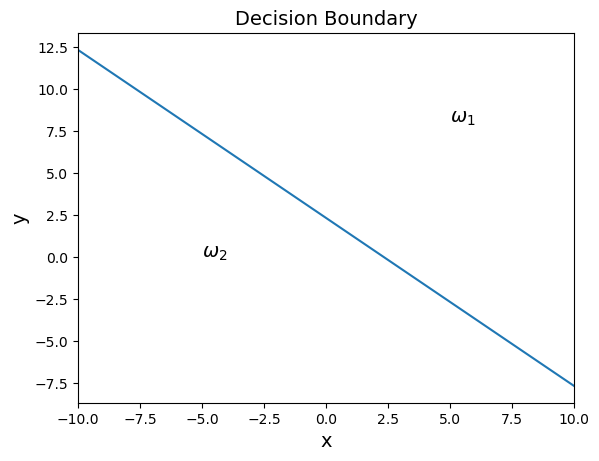

In [2]:
x = np.arange(-10, 11, 1)
y = 2+0.5*np.log(2)-x
plt.plot(x, y)
plt.title('Decision Boundary', fontsize=14)
plt.text(5, 8, r'$\omega_1$', fontsize=14)
plt.text(-5, 0, r'$\omega_2$', fontsize=14)
plt.xlim(-10, 10)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.savefig('db.png', dpi=100)
plt.show()

# Sample the posterior

In [3]:
N = 1000
u = np.random.uniform(size=N)
ws = np.zeros_like(u)
ind = u>2/3
ws[ind] = 1

In [4]:
xs = []
ys = []
for w in ws:
    if w==1:
        # mean=2
        x,y = np.random.randn(2) + 2
        xs.append(x)
        ys.append(y)
    else:
        # mean=0
        x,y = np.random.randn(2)
        xs.append(x)
        ys.append(y)
xs = np.array(xs)
ys = np.array(ys)

In [5]:
x_arr = np.vstack([xs, ys]).T

In [6]:
np.linalg.norm(x_arr, axis = 1, ord=np.inf).shape

(1000,)

In [19]:
# define different windows
def parzen_win(xs, ys, x_g, y_g, h, N):
    # xs, ys: smaple points
    # x_g, y_g: grid points
    # h: window width
    # N: num of samples
    ps = []
    for i in range(len(x_g)):
        x = x_g[i]
        for j in range(len(y_g)):
            y = y_g[j]
            # d = np.sqrt((xs/h - x/h)**2 + (ys/h - y/h)**2)
            x_arr = np.vstack([xs/h - x/h, ys/h - y/h]).T
            d = np.linalg.norm(x_arr, axis=1, ord=np.inf)
            p = (np.sum(d < 1/2) + np.sum(d==1/2))/N/(h**2)
            ps.append(p)
    ps = np.array(ps)
    ps = ps.reshape(len(y_g), len(x_g))
    return ps

def gaussian_win(xs, ys, x_g, y_g, h, N):
    ps = []
    for i in range(len(x_g)):
        x = x_g[i]
        for j in range(len(y_g)):
            y = y_g[j]
            k = 1/np.sqrt(2*np.pi*h**2) * np.exp(-((xs/h-x/h)**2 + (ys/h-y/h)**2)/(2*h**2))
            p = np.sum(k)/N
            ps.append(p)
    ps = np.array(ps)
    ps = ps.reshape(len(y_g), len(x_g))
    return ps

def exp_win(xs, ys, x_g, y_g, h, N):
    ps = []
    for i in range(len(x_g)):
        x = x_g[i]
        for j in range(len(y_g)):
            y = y_g[j]
            k = 1/h * np.exp(-(np.sqrt((xs/h-x/h)**2 + (ys/h-y/h)**2))/h)
            p = np.sum(k)/N
            ps.append(p)
    ps = np.array(ps)
    ps = ps.reshape(len(y_g), len(x_g))
    return ps

In [17]:
lim = 5
step = 0.02
x_grid = np.arange(-lim, lim+step, step)
y_grid = np.arange(-lim, lim+step, step)
f = 1/(2*np.pi) * (1/3*(np.exp(-((x_grid-2)**2 + (y_grid-2)**2)/2)) + 2/3*(np.exp(-(x_grid**2+y_grid**2)/2)))

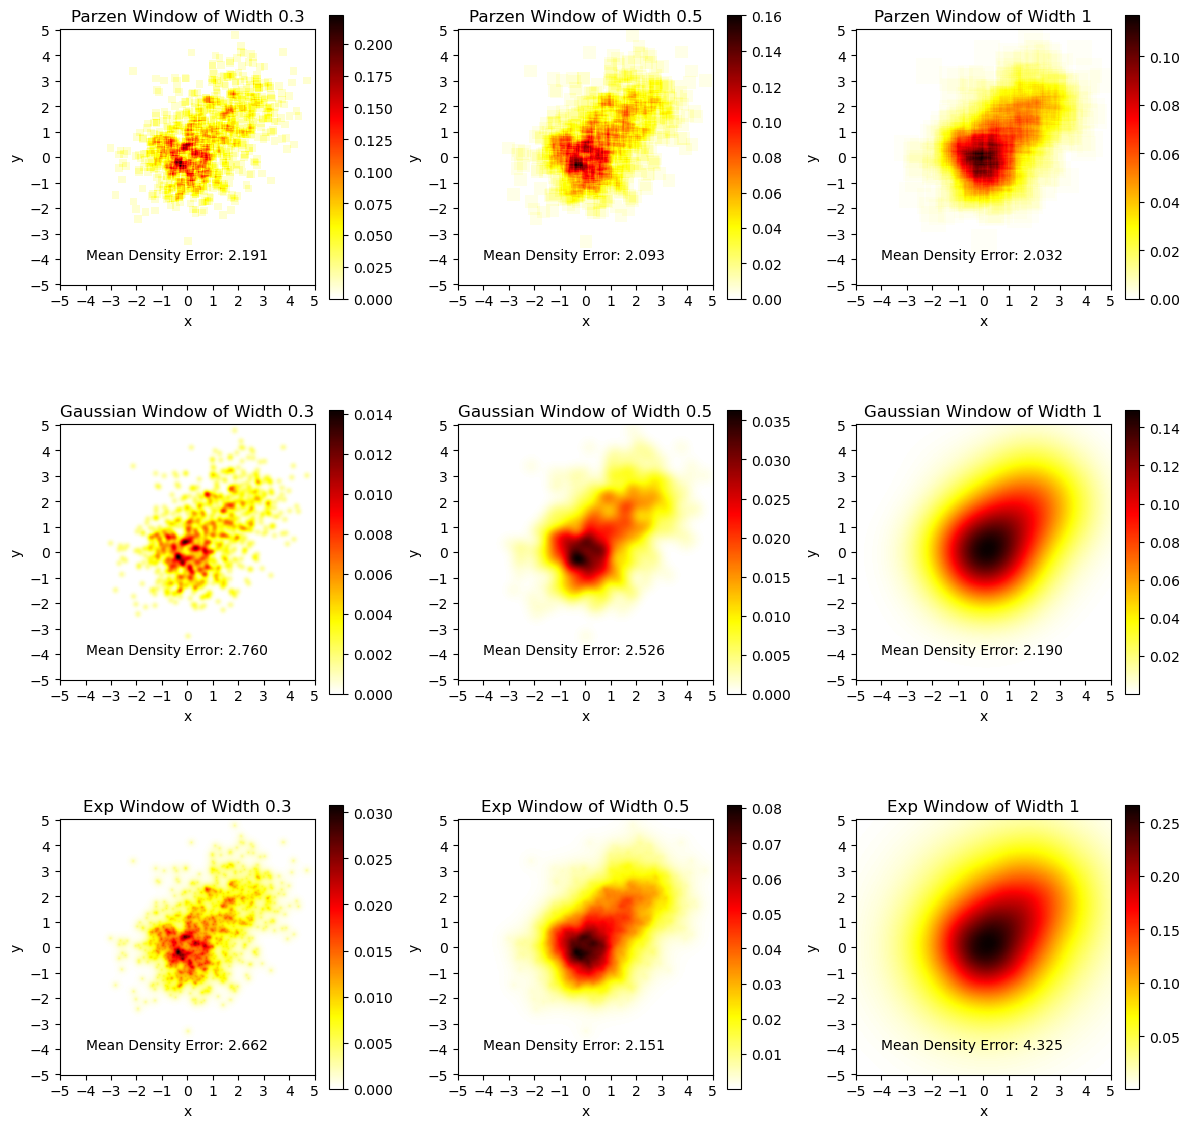

In [20]:
# the main plot
kernels = ['Parzen', 'Gaussian', 'Exp']
win_widths = [0.3, 0.5, 1]
pss = []
errs = []
fig = plt.figure(figsize=(12, 12))
for i,k in enumerate(kernels):
    for j,width in enumerate(win_widths):
        if i==0:
            ps = parzen_win(xs, ys, x_grid, y_grid, width, N)
        if i==1:
            ps = gaussian_win(xs, ys, x_grid, y_grid, width, N)
        if i==2:
            ps = exp_win(xs, ys, x_grid, y_grid, width, N)
        
        pss.append(ps)
        err = np.sum(abs(ps-f))*step**2
        errs.append(err)
        
        ax = fig.add_subplot(3, 3, i*3+j+1)
        pm = ax.pcolormesh(x_grid, y_grid, ps, cmap='hot_r')
        ax.set_xticks(np.arange(-5, 6, 1))
        ax.set_yticks(np.arange(-5, 6, 1))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_title('%s Window of Width %s'%(k, width))
        ax.text(-4, -4, 'Mean Density Error: {:.3f}'.format(err))
        fig.colorbar(pm, fraction=0.05, pad=0.05)
        
fig.tight_layout()
plt.savefig('all.png', dpi=200)
plt.show()

## single configuration

In [27]:
h = 1
ps = parzen_win(xs, ys, x_grid, y_grid, h, N)
# ps_grid = ps * step**2

2495.850000000001


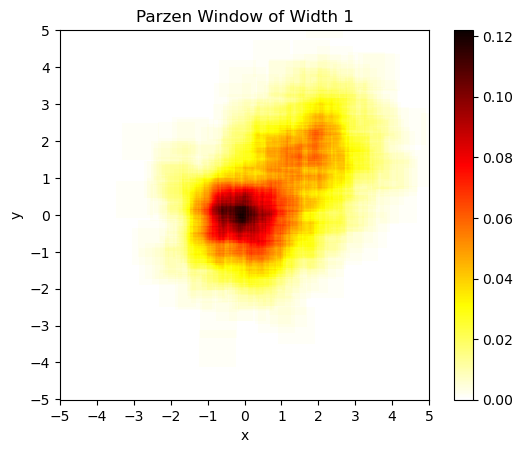

In [28]:
print(np.sum(ps))
fig, ax = plt.subplots()
pm = ax.pcolormesh(x_grid, y_grid, ps, cmap='hot_r')
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_title('Parzen Window of Width %s'%h)
fig.colorbar(pm)
plt.savefig('p_win.png', dpi=200)
plt.show()

In [29]:
np.sum(abs(ps-f))*step**2

2.037783755434738

In [13]:
h = 0.5
ps = gaussian_win(xs, ys, x_grid, y_grid, h, N)

624.8173587346922


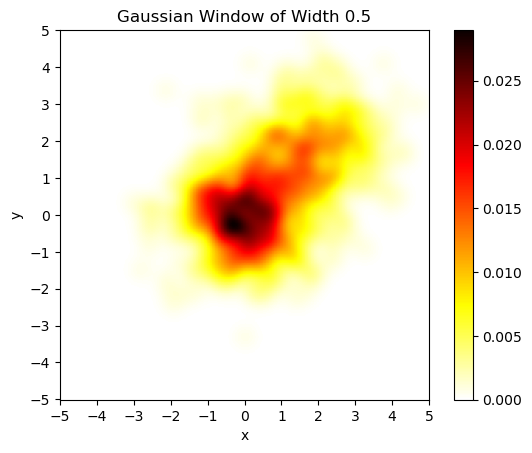

In [14]:
print(np.sum(ps))
fig, ax = plt.subplots()
pm = ax.pcolormesh(x_grid, y_grid, ps, cmap='hot_r')
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_title('Gaussian Window of Width %s'%h)
fig.colorbar(pm)
# plt.savefig('p_win.png', dpi=200)
plt.show()

In [13]:
np.sum(abs(ps-f))*step**2

2.0495283391578174

In [14]:
h = 0.5
ps = exp_win(xs, ys, x_grid, y_grid, h, N)
err = np.sum(abs(ps-f))*step**2

7835.180639103571


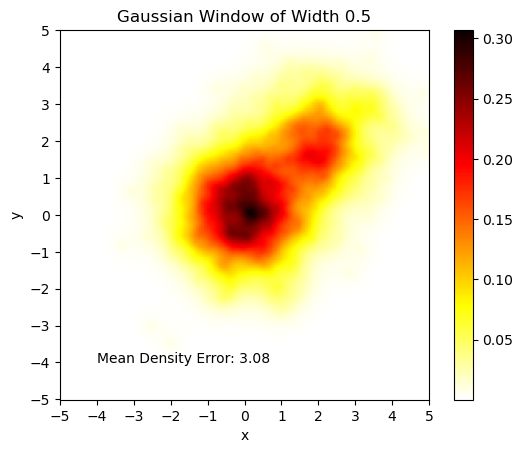

In [15]:
print(np.sum(ps))
fig, ax = plt.subplots()
pm = ax.pcolormesh(x_grid, y_grid, ps, cmap='hot_r')
ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
ax.set_title('Gaussian Window of Width %s'%h)
ax.text(-4, -4, 'Mean Density Error: {:.2f}'.format(err))
fig.colorbar(pm)
# plt.savefig('p_win.png', dpi=200)
plt.show()

In [16]:
np.sum(abs(ps-f))*step**2

3.0798326219017804

# Draft

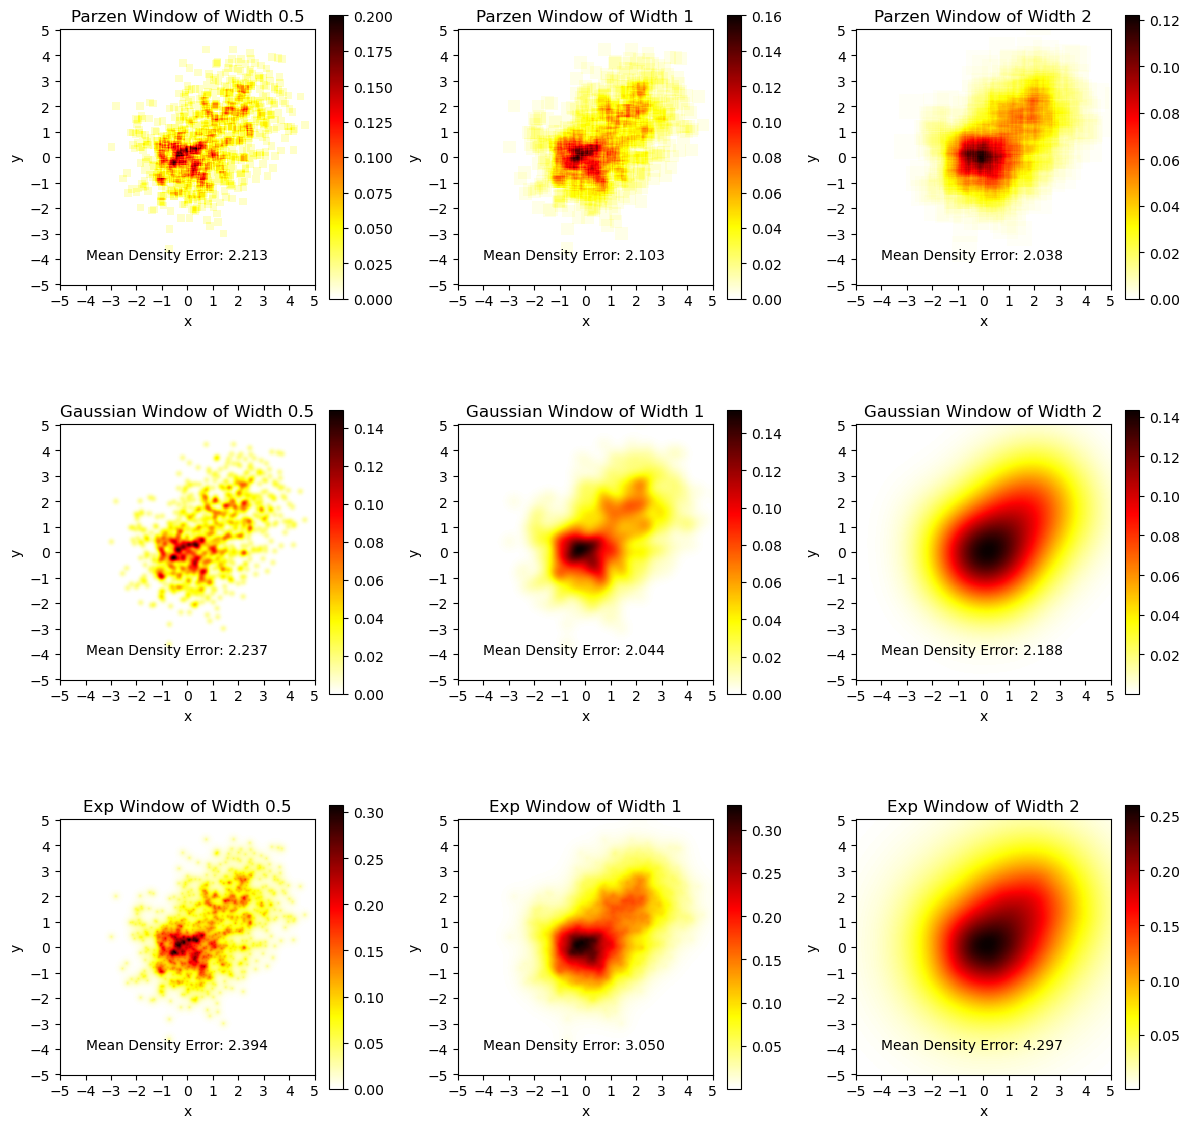

In [32]:
kernels = ['Parzen', 'Gaussian', 'Exp']
win_widths = [0.5, 1, 2]
fig = plt.figure(figsize=(12, 12))
for i,k in enumerate(kernels):
    for j,width in enumerate(win_widths):
        # if i==0:
        #     ps = parzen_win(xs, ys, x_grid, y_grid, width, N)
        # if i==1:
        #     ps = gaussian_win(xs, ys, x_grid, y_grid, width, N)
        # if i==2:
        #     ps = exp_win(xs, ys, x_grid, y_grid, width, N)
        
        # pss.append(pss)
        # err = np.sum(abs(ps-f))*step**2
        # errs.append(err)
        
        ax = fig.add_subplot(3, 3, i*3+j+1)
        pm = ax.pcolormesh(x_grid, y_grid, pss[i*3+j], cmap='hot_r')
        ax.set_xticks(np.arange(-5, 6, 1))
        ax.set_yticks(np.arange(-5, 6, 1))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_title('%s Window of Width %s'%(k, width))
        ax.text(-4, -4, 'Mean Density Error: {:.3f}'.format(errs[i*3+j]))
        fig.colorbar(pm, fraction=0.05, pad=0.05)
        # plt.savefig('p_win.png', dpi=200)
fig.tight_layout()
plt.savefig('all.png', dpi=200)
plt.show()

In [18]:
# fig, ax = plt.subplots()
# cf = ax.contourf(x_grid, y_grid, ps, cmap='hot_r')
# ax.set_xticks(np.arange(-5, 6, 1))
# ax.set_yticks(np.arange(-5, 6, 1))
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_aspect('equal')
# fig.colorbar(cf)
# plt.show()

In [19]:
# plt.scatter(xs, ys, c=ps, cmap='hot_r', s=1)
# plt.show()

In [20]:
# ps_grid = []
# for i in range(x_grid.shape[0]):
#     if i==x_grid.shape[0]-1:
#         ind_x = ((xs>x_grid[i]) + (xs==x_grid[i]))*((xs<x_grid[i]+step)+(xs==x_grid[i]+step))
#     else:
#         ind_x = ((xs>x_grid[i]) + (xs==x_grid[i]))*((xs<x_grid[i+1])+(xs==x_grid[i+1]))
#     for j in range(y_grid.shape[0]):
#         if j==y_grid.shape[0]-1:
#             ind_y = ((ys>y_grid[j]) + (ys==y_grid[j]))*((ys<y_grid[j]+step)+(ys==y_grid[j]+step))
#         else:
#             ind_y = ((ys>y_grid[j]) + (ys==y_grid[j]))*((ys<y_grid[j+1])+(ys==y_grid[j+1]))
        
#         ind = ind_x*ind_y
#         if np.sum(ind)==0:
#             p_grid = 0
#         elif np.sum(ind)==1:
#             p_grid = ps[ind][0] * step**2
#         else:
#             p_grid = np.mean(ps[ind]) * step**2
#         ps_grid.append(p_grid)

In [21]:
# ps_grid = np.array(ps_grid)
# print(ps_grid.shape)
# ps_grid = ps_grid.reshape(x_grid.shape[0], y_grid.shape[0])
# print(ps_grid.shape)